In [ ]:
import pandas as pd;
preprocessed_df = pd.read_csv("../data/raw/combined_responses.csv", low_memory=False)
preprocessed_df

## Cleaning Headers

In [ ]:
# Check for the column headers convention
print(preprocessed_df.columns)

In [ ]:
# Remove leading and trailing spaces from column headers
df = preprocessed_df.rename(columns=lambda x: x.strip(), inplace=True)
# Check for the formatted columns names 
print(preprocessed_df.columns)

In [132]:
# Header contains space and inproper naming convention usage
from dataprep.clean import clean_headers

# Format the data headers to snakecase 
# preprocessed_df = clean_headers(preprocessed_df, case="snake") , remove_accents=False)
preprocessed_df = clean_headers(preprocessed_df, remove_accents=False) 

# Check for the formatted columns names 
print(preprocessed_df.columns)

Column Headers Cleaning Report:
Index(['what_is_your_age_#_years', 'what_is_your_gender',
       'in_which_country_do_you_currently_reside',
       'what_is_the_highest_level_of_formal_education_that_you_have_attained_or_plan_to_attain_within_the_next_2_years',
       'select_the_title_most_similar_to_your_current_role_or_most_recent_title_if_retired',
       'what_is_the_size_of_the_company_where_you_are_employed',
       'approximately_how_many_individuals_are_responsible_for_data_science_workloads_at_your_place_of_business',
       'does_your_current_employer_incorporate_machine_learning_methods_into_their_business',
       'what_is_your_current_yearly_compensation_approximate_$_usd',
       'approximately_how_much_money_have_you_spent_on_machine_learning_and_or_cloud_computing_products_at_your_work_in_the_past_5_years',
       'what_is_the_primary_tool_that_you_use_at_work_or_school_to_analyze_data',
       'how_long_have_you_been_writing_code_to_analyze_data_at_work_or_at_school',

In [178]:
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
# Create the profile report
profile_preprocessed_survey = ProfileReport(preprocessed_df)
profile_preprocessed_survey.to_file('profile_preprocessed_survey.html')

## Remove column with High Missing Value Percentage

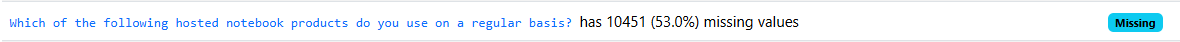
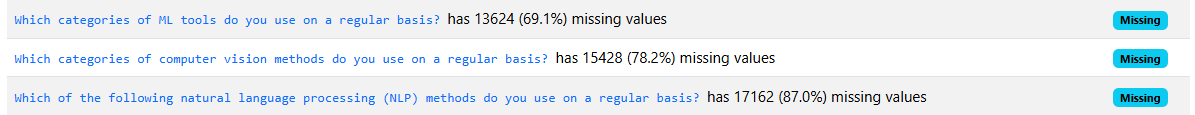
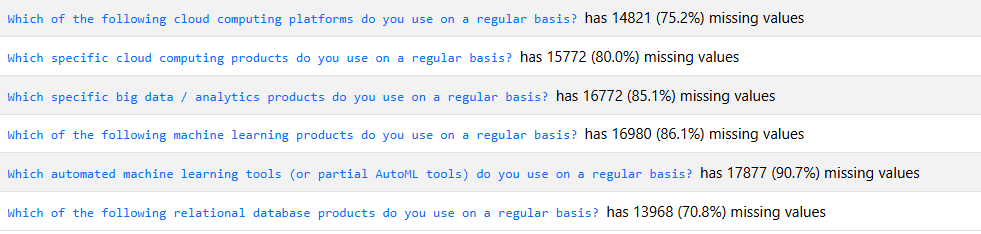

In [ ]:
# Set the threshold for dropping columns
threshold = 0.5 * preprocessed_df.shape[0]

# Drop columns with more than 50% missing values
preprocessed_df = preprocessed_df.dropna(thresh=threshold, axis=1)

# Display the modified DataFrame to confirm columns are removed
preprocessed_df.head()

In [180]:
preprocessed_df.shape

(19717, 25)

## Handle Missing Values

In [ ]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

### Drop Rows with Missing Values

In [ ]:
# Check that all columns exist in DataFrame
columns_with_missing = [
    'Which of the following machine learning frameworks do you use on a regular basis?',
    'What programming languages do you use on a regular basis?',
    'What data visualization libraries or tools do you use on a regular basis?',
    'Which types of specialized hardware do you use on a regular basis?',
    'Which of the following ML algorithms do you use on a regular basis?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

In [182]:
preprocessed_df.shape

(13753, 25)

In [ ]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

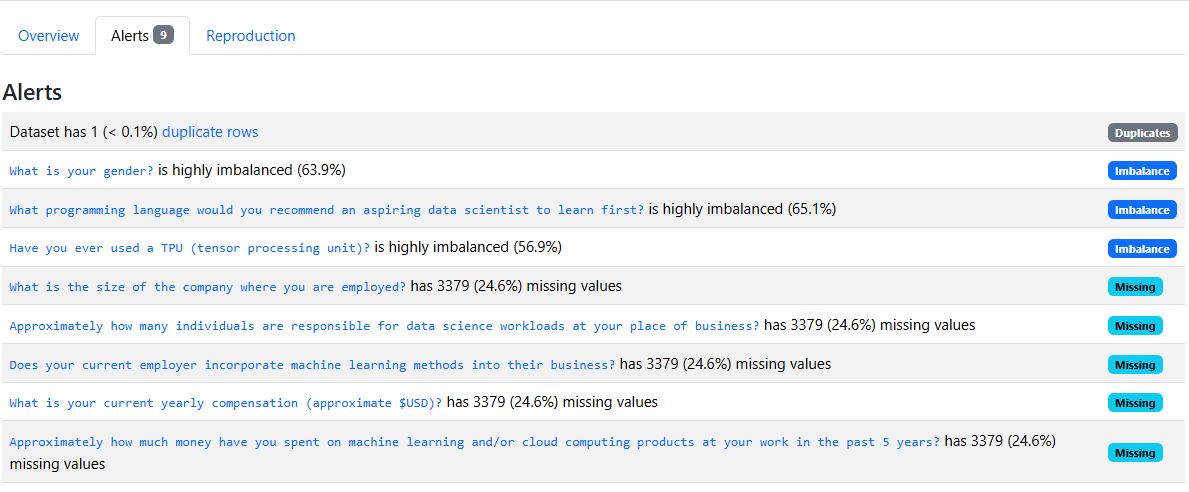

In [ ]:
# Drop rows with remaining missing values
# Check that all columns exist in DataFrame
columns_with_missing = [
    'What is the size of the company where you are employed?',
    'Approximately how many individuals are responsible for data science workloads at your place of business?',
    'Does your current employer incorporate machine learning methods into their business?',
    'What is your current yearly compensation (approximate $USD)?',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

In [ ]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

## Address the imbalanced data profile
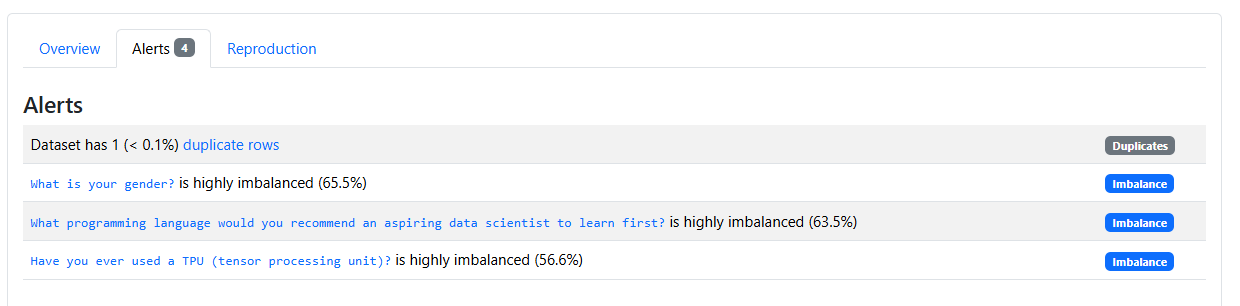

In [185]:
# Keep only rows where the gender is Male or Female
preprocessed_df = preprocessed_df[preprocessed_df['What is your gender?'].isin(['Male', 'Female'])]

# Verify the remaining distribution
print(preprocessed_df['What is your gender?'].value_counts(normalize=True) * 100)


Male      86.046739
Female    13.953261
Name: What is your gender?, dtype: float64


In [168]:
preprocessed_df.shape

(10227, 25)

In [186]:
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].unique()

array(['Python', 'Java', 'R', 'SQL', 'C++', 'None', 'Other', 'C',
       'MATLAB', 'TypeScript', 'Javascript', 'Bash'], dtype=object)

In [188]:
preprocessed_df.shape

(10227, 25)

In [187]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [169]:
# Define a threshold for frequency under which categories are grouped as "Other"
threshold = 0.01  # 1%
total_count = len(preprocessed_df)
value_counts = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True)

# Group rare categories below threshold frequency
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Check the new distribution
print(preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True))

Python    0.770509
R         0.101300
SQL       0.069522
Other     0.035983
C++       0.011929
MATLAB    0.010756
Name: What programming language would you recommend an aspiring data scientist to learn first?, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_21604\2544130174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].apply(lambda x: x if value_counts[x] >= threshold else 'Other')


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Step 1: Group Low-Frequency Categories
threshold = 0.01  # 1% threshold
value_counts = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True)
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].apply(
    lambda x: x if value_counts[x] >= threshold else 'Other'
)

# Step 2: One-Hot Encode the Grouped Data
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(preprocessed_df[['What programming language would you recommend an aspiring data scientist to learn first?']])

# Convert encoded data to DataFrame for easier handling (optional)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Step 3: Apply PCA for Dimensionality Reduction
# Adjust n_components based on the level of reduction desired
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_df)

# Convert PCA results to a DataFrame and concatenate with original DataFrame if needed
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
preprocessed_df = pd.concat([preprocessed_df, pca_df], axis=1)

# Check the result
preprocessed_df.head()

In [170]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Step 1: Check for and handle missing values in the relevant column
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].fillna('Unknown', inplace=True)

# Step 2: Group Low-Frequency Categories
threshold = 0.01  # 1% threshold
value_counts = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True)
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].apply(
    lambda x: x if value_counts[x] >= threshold else 'Other'
)

# Step 3: One-Hot Encode the Grouped Data
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(preprocessed_df[['What programming language would you recommend an aspiring data scientist to learn first?']])

# Convert encoded data to DataFrame and ensure row alignment
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df.index = preprocessed_df.index  # align indices with the original DataFrame

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_df)

# Convert PCA results to DataFrame and align indices
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'], index=preprocessed_df.index)

# Step 5: Concatenate PCA results with original DataFrame
preprocessed_df = pd.concat([preprocessed_df, pca_df], axis=1)

# Check the result for any increase in row count or unexpected NaNs
preprocessed_df.shape
print(preprocessed_df.isna().sum())

C:\Users\Huawei\AppData\Local\Temp\ipykernel_21604\3325992900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].fillna('Unknown', inplace=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_21604\3325992900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df['What programming language would you recommend an aspiring data scientist 

What is your age (# years)?                                                                                                          0
What is your gender?                                                                                                                 0
In which country do you currently reside?                                                                                            0
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                      0
Select the title most similar to your current role (or most recent title if retired)                                                 0
What is the size of the company where you are employed?                                                                              0
Approximately how many individuals are responsible for data science workloads at your place of business?                             0
Does your current employer incorporate machine learning

In [171]:
preprocessed_df.shape

(10227, 27)

In [172]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Frequency Encode the Categorical Column
# Get the counts for each category
value_counts = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts()

# Map each category to its frequency count
preprocessed_df['language_freq'] = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].map(value_counts)

# Step 2: Apply Log Transformation to Reduce Skew
# This will reduce the dominance of the majority class by scaling down large counts
preprocessed_df['language_freq'] = np.log1p(preprocessed_df['language_freq'])

# Step 3: Apply PCA (if needed for dimensionality reduction)
# Here we only have one feature (language_freq), so PCA is not necessary. However, if you had multiple columns,
# you could combine them and apply PCA here.

# Step 4: Drop the original categorical column
preprocessed_df = preprocessed_df.drop(columns=['What programming language would you recommend an aspiring data scientist to learn first?'])

# Check the new distribution
print(preprocessed_df['language_freq'].describe())
print(preprocessed_df.head())